## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y3S2.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,UAMG1043,UCCA2103,UCCD2063,UCCD2213,UCCD3243,UCCD3583,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,Female,Pahang,57,79,66,72,72,65,3.100000,2.920988,2.862222
1,Male,Kedah,63,73,61,68,60,58,2.783333,2.895062,2.948889
2,Male,Malacca,74,68,63,65,78,57,2.933333,2.992593,2.993333
3,Female,Kelantan,66,74,60,76,63,74,3.050000,2.935802,2.962222
4,Male,Perak,71,61,77,74,74,56,3.033333,2.893827,2.871111
5,Male,Johor,61,57,48,60,66,74,2.333333,2.637037,2.683333
6,Female,Negeri Sembilan,68,74,73,72,61,81,3.216667,2.946914,2.898889


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 11)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
UAMG1043          0
UCCA2103          0
UCCD2063          0
UCCD2213          0
UCCD3243          0
UCCD3583          0
Semester1_GPA     0
Semester1_CGPA    7
Semester2_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
UAMG1043          0
UCCA2103          0
UCCD2063          0
UCCD2213          0
UCCD3243          0
UCCD3583          0
Semester1_GPA     0
Semester1_CGPA    0
Semester2_CGPA    0
dtype: int64

In [8]:
df1.describe()

,UAMG1043,UCCA2103,UCCD2063,UCCD2213,UCCD3243,UCCD3583,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,66.023416,65.983288,66.053738,65.924947,65.950165,66.132293,2.846337,2.872690,2.869392
std,8.529716,8.417238,8.448486,8.382003,8.460093,8.396423,0.244052,0.107267,0.102527
min,42.000000,42.000000,42.000000,42.000000,43.000000,42.000000,1.383333,2.359259,2.420430
25%,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,2.716667,2.802469,2.803333
50%,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,2.883333,2.875309,2.872222
75%,72.000000,72.000000,72.000000,72.000000,72.000000,73.000000,3.000000,2.946914,2.938889
max,89.000000,90.000000,90.000000,90.000000,89.000000,90.000000,3.500000,3.233333,3.235556


In [9]:
df1.dtypes

Gender             object
State              object
UAMG1043            int64
UCCA2103            int64
UCCD2063            int64
UCCD2213            int64
UCCD3243            int64
UCCD3583            int64
Semester1_GPA     float64
Semester1_CGPA    float64
Semester2_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 3 Semester 2 CGPA')]

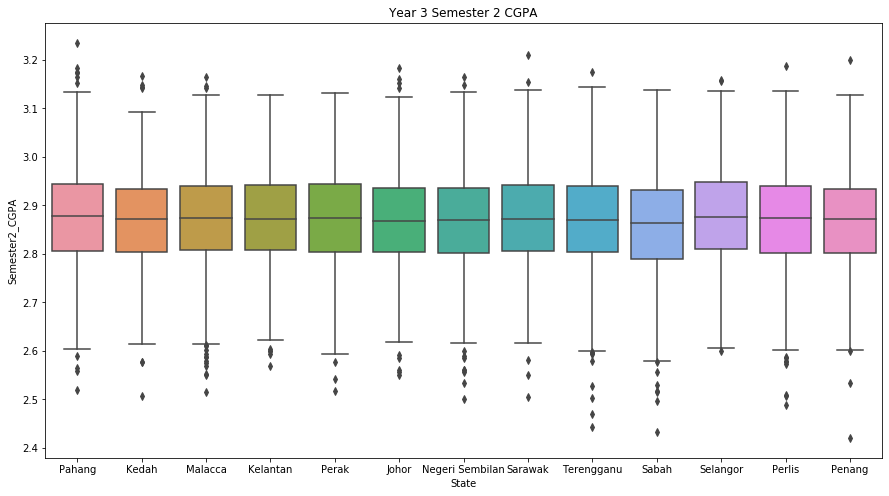

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester2_CGPA',data=df1).set(title='Year 3 Semester 2 CGPA')

In [11]:
gen =df1[df1['Semester2_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              620
Negeri Sembilan    614
Malacca            609
Terengganu         602
Perlis             598
Selangor           596
Kelantan           594
Sarawak            587
Kedah              573
Pahang             571
Perak              562
Sabah              555
Penang             531
Name: State, dtype: int64

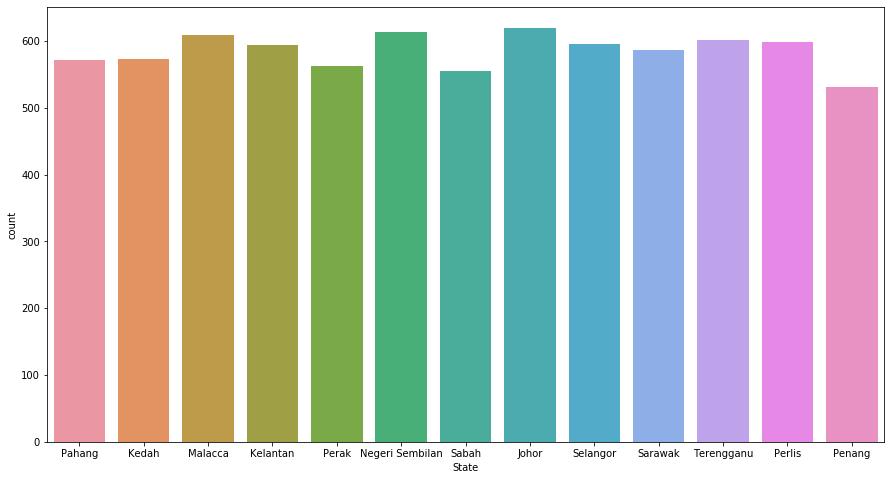

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Female    3825
Male      3787
Name: Gender, dtype: int64

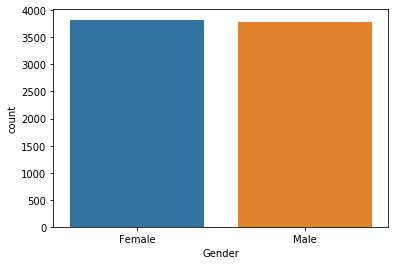

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 9)

In [18]:
#Print the data after dropping the columns
df1.head()

,UAMG1043,UCCA2103,UCCD2063,UCCD2213,UCCD3243,UCCD3583,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,57,79,66,72,72,65,3.100000,2.920988,2.862222
1,63,73,61,68,60,58,2.783333,2.895062,2.948889
2,74,68,63,65,78,57,2.933333,2.992593,2.993333
3,66,74,60,76,63,74,3.050000,2.935802,2.962222
4,71,61,77,74,74,56,3.033333,2.893827,2.871111


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 88.95632652530429


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.77627019]
 [2.82135593]
 [2.78001986]
 ...
 [2.9144988 ]
 [2.91657119]
 [2.51036691]]
      Semester2_CGPA
5505        2.811111
9110        2.771111
1389        2.773333
9328        2.731111
3459        2.797778
...              ...
2864        2.884444
3893        2.818889
638         2.925556
5183        2.920000
1571        2.515556

[2998 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y3S2.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()